## Ordinary Differential Equations
John Lochner & Andrew Sos

Homework 3

## Introduction
In this report we will solve a 1D inhomogenous Laplace equation numerically and also find eigenvalues of the time-indpendent Schrodinger equation for a particle in a box numerically and analytically. We will use the central finite difference method to solve these problems and implement a periodic boundary condition for the particle in a box. We also will find eiganvalues for the time-indpendent Schrodinger equation for a particle in a box for the first two band indexes in the first Brillouin zone in 1D

# Problem 1:
Key Equations:

The following Poisson's equation in 1D
$$
    \frac{d^2}{dx^2} \phi(x) = 2\exp(-x^2),
$$
has the exact solution
$$
    \phi(x) = \sqrt{\pi}\, {\rm erf}\, (x) x + \exp(-x^2) + C_1 x + C_2,
$$
where ${\rm erf}$ is [the error function](http://dlmf.nist.gov/7.2.i) implemented in the library [SpecialFunctions.jl](https://specialfunctions.juliamath.org/v0.1/), $C_1$ and $C_2$ are arbitrary constants. 

Central finite difference method:
$$
\begin{align}
	f'(x) &\approx [ f(x+\Delta x/2) - f(x-\Delta x/2) ] / \Delta x = f'(x) + O\left( \Delta x^2 \right)  \\
	f''(x) &\approx  [ f'(x+\Delta x/2) - f'(x-\Delta x/2) ] / \Delta x  = [ f(x + \Delta x) - 2f(x) + f(x- \Delta x)] / \Delta x^2  + O\left( \Delta x^2 \right). 
\end{align}
$$
Goals:

1) Numerically solve this inhomogenious Laplace's equation by using the central finite-difference method.
2) What values of the constants $C_1$ and $C_2$ should be chosen so that the obtained numerical solutions closely overlaps (on the plot) with the exact solution?


# Solution
The numerical approximation is implemented by generating a grid, calling the second derivative at the grid points then dividing by the step size. 
This solution is backsolved with the original matrix to yield a vector consisting of the numerical approximation. 

Depending on the range used for the numerical approximation, two constants (two steps of integration) are required to fit the exact solution with the numerical solution. 

The two solution vectors are subtracted, yielding a difference vector of C1x+C2. Since our difference vector was constant, C1 was 0, and C2 was 17.76. This was added to the exact equation resulting in perfect overlap. 


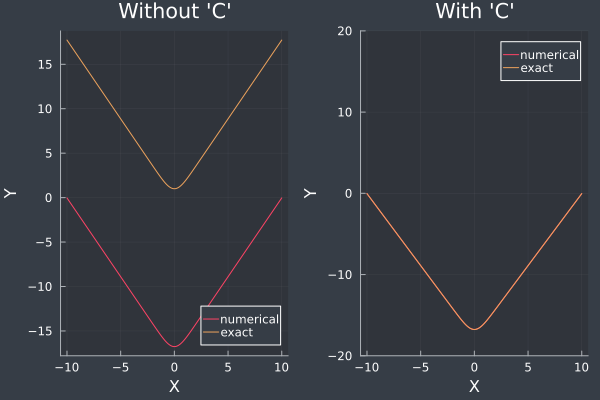

In [3]:
using LinearAlgebra, Plots, SpecialFunctions,Statistics
theme(:dark)
x=collect(-10:.02:10)
Δx=.02
N=length(x)
B = 2 .*exp.(-x.^2)
A = zeros(N,N)
for i in 1:N, j in 1:N
  abs(i-j)<=1 && (A[i,j]+=1)
  i==j && (A[i,j]-=3)
end
A = A/(Δx^2)
numerical_sol=A\B
#
exact_fun=x->sqrt(pi).*erf.(x).*x+exp.(-x.^2)
exact_sol=exact_fun(x)
diff=exact_sol-numerical_sol
c2=mean(diff)
c1=0
exact_fun1=x->sqrt(pi).*erf.(x).*x+exp.(-x.^2) +c1 .*x  .-c2
exact_sol1=exact_fun1(x)
#
pt1=Plots.plot(x,numerical_sol,label="numerical")
Plots.plot!(pt1,x,exact_sol,label="exact",title="Without 'C'",ylabel="Y",xlabel="X")
pt2=Plots.plot(x,numerical_sol,label="numerical")
Plots.plot!(pt2,x,exact_sol1,label="exact",title="With 'C'",ylabel="Y",xlabel="X")
##
ylims!(pt2,-20,20)
display(plot(pt1,pt2))
gui()

# Number 2
The central finite difference method was derived. This method is efficient in optimizing a numerical solution to a differential equation using the central node. The boundary conditions for our original central finite differnece method were as followed:
$\psi(a) = \psi(b)$ and $\psi'(a) = \psi'(b)$.


Key Equations:


The first condition is discretized as 
$$
  \psi(a) = \psi(b) \Longrightarrow \psi(x_0) = \psi(x_N).
$$

Whereas, the second condition is discretized as 
$$
    \psi'(a) = \psi'(b) \Longrightarrow
$$

$$
    \frac{\psi(x_1) - \psi(x_0)}{\Delta x} = \frac{\psi(x_{N+1}) - \psi(x_{N})}{\Delta x}
    \Longrightarrow
$$
$$
    \psi(x_1) - \psi(x_N) = \psi(x_{N+1}) - \psi(x_{N})
    \Longrightarrow
$$
$$
    \psi(x_1) = \psi(x_{N+1}).
$$

## Analytical Solution
Time independent Schrodinger EQ is discretized as:
$$
\begin{align}
	-\frac{\psi(x_{k+1}) - 2\psi(x_{k})  + \psi(x_{k - 1})}{2\Delta x^2} + U(x_k)  \psi(x_{k}) = E  \psi(x_{k}),
	\qquad k=1,1,2,\ldots,N,
\end{align}
$$
Matrix representation of time independent Schrodinger eqaution has periodic boundary condition:

(1)   $$\psi(x_{0}) = \psi(x_{N+1}) = 0$$

In discrete form,

(2)  $$\psi'(a) = \psi'(b)$$
and
$$
    \psi(x_1) = \psi(x_{N+1}).
$$
Central finite difference method:
$$
\begin{align}
	f'(x) &\approx [ f(x+\Delta x/2) - f(x-\Delta x/2) ] / \Delta x = f'(x) + O\left( \Delta x^2 \right) \Longrightarrow {CentralFinitDiffApprox} \\
	f''(x) &\approx  [ f'(x+\Delta x/2) - f'(x-\Delta x/2) ] / \Delta x  = [ f(x + \Delta x) - 2f(x) + f(x- \Delta x)] / \Delta x^2  + O\left( \Delta x^2 \right). 
\end{align}
$$


Listing K values, then adjusting for boundary conditions yields a pattern:

K=1$$-\frac{\psi(x_2) - 2\psi(x_1)+\psi(x_0)}{2\Delta x^2} + U(x_1)  \psi(x_1) = E \psi(x_1)$$

K=2$$\frac{\psi(x_3) - 2\psi(x_2)+\psi(x_1)}{2\Delta x^2} + U(x_2)  \psi(x_2) = E  \psi(x_2)$$
K=...$$...$$\
K=$N-1$ $$\frac{\psi(x_N) - 2\psi(x_{N-1})+\psi(x_{N-2})}{2\Delta x^2} + U(x_{N-1})  \psi(x_{N-1}) = E  \psi(x_{N-1})$$
K=$N$ $$\frac{\psi(x_{N+1}) - 2\psi(x_{N})+\psi(x_{N-1})}{2\Delta x^2} + U(x_N)  \psi(x_N) = E  \psi(x_N)=\frac{\psi(x_{1}) - 2\psi(x_{N})+\psi(x_{N-1})}{2\Delta x^2} + U(x_N)  \psi(x_N)$$

This pattern is represented as a matrix and is the Hermitian finite dimensional approximation of the above Hamiltonian:
\
\
$(\frac{-1}{2\Delta x^2})$ *
$\begin{pmatrix}
-2 & 1       & 0      & 0     & \cdots & 0 & 0  & 0  & 1 \\
1  & -2      & 1      & 0     & \cdots & 0 & 0  & 0  & 0 \\ 
 \ddots  &  \ddots & \ddots & \ddots &    \ddots     &  \ddots  &  \ddots   &  \ddots   &  \ddots  \\
0  & 0       & 0      & 0     & \cdots & 0 & 1  & -2 & 1  \\
1  & 0       & 0      & 0     & \cdots & 0 & 0  & 1  & -2 \\
\end{pmatrix}$
+
$\begin{pmatrix}
U(x_1) &       &       &       &       &          &           &         \\   
       &U(x_2)&       &       &       &          &           &          \\   
       &      &       & \ddots&       &          &           &          \\ 
       &      &       &       & \ddots&          &           &          \\        
       &      &       &       &       &          & U(x_{N-1})&          \\   
       &      &       &       &       &          &           & U(x_{N}) \\
       \end{pmatrix}$
       $\begin{pmatrix}
\Psi(x_1) \\
\Psi(x_2) \\
\Psi(x_{N-1}) \\
\Psi(x_{N}) \\ \end{pmatrix}$= E
$\begin{pmatrix}
\Psi(x_1) \\
\Psi(x_2) \\
\Psi(x_{N-1}) \\
\Psi(x_{N}) \\ \end{pmatrix}$

Overall, we were able to show how the boundry conditions for central difference method's boundry's change the conditions of the matrix.  

## Problem 3

Key Equations:

The goal of this questions was to numerically find the eigenenergies of the Schrödinger equation for a particle in the box with the periodic boundary condition and $a=0$ and $b=1$. 

 When plotting this with central finite difference and the boundries of:
 
 $\psi(a) = \psi(b)$ and $\psi'(a) = \psi'(b)$.

 We were then supposed to compare the numerically obtained result with the exact energies, which are: $E_n = 2 (\pi n)^2$, where $n=0, \pm 1, \pm 2, \pm 3, \ldots$.

 For the periodic boundary conditions, the coordinate grid needs to be chosen differently that for the particle-in-the-box case (i.e., not like `range(a, b, N)`). The accurate choice is

$$
    x_m = a + (m - 1)(b - a) / N, \qquad m =1,2, \ldots N.
$$
For these boundry conditions, it is important to remember that $x_N < b$! or this equation will not work

# Solution:

In [3]:
using LinearAlgebra
function energies_Q2(U::Function, a::Real, b::Real, N::Int)
    m=range(1, N, N)
    x = a.+((m.-1).*(b-a)/N)
    Δx = x[2] - x[1]
   
    Hamiltonian =  -1 ./(2*(Δx)^2) * diagm(
        -1 => ones(N-1), 
        0 => -2*ones(N), 
        1 => ones(N-1),
        (N-1)=>ones(1),
        (-N+1)=>ones(1))

    Hamiltonian += diagm(U.(x))
    return eigvals(Hamiltonian)
end
energies1= energies_Q2(x -> 0,0,1,1000)

1000-element Vector{Float64}:
   3.971649675804656e-10
  19.739143862888156
  19.739143863107827
  78.95579618386193
  78.95579618418799
 177.64761919104342
 177.6476191915944
 315.81071669982913
 315.8107167007269
 493.4396342683507
 493.4396342692956
 710.5273594104646
 710.5273594111243
   ⋮
   1.9992894726405896e6
   1.9995065603657314e6
   1.9995065603657323e6
   1.9996841892832993e6
   1.999684189283301e6
   1.999822352380809e6
   1.9998223523808105e6
   1.9999210442038162e6
   1.999921044203817e6
   1.999980260856137e6
   1.9999802608561376e6
   2.0e6

In [4]:
using LinearAlgebra
n = range(1,length(energies1)+1,1000)
exact_energies1=2 .*(pi.*n).^2

1000-element Vector{Float64}:
   19.739208802178716
   79.03589085854118
  177.8900659478339
  316.3017340700569
  494.27089522521015
  711.7975494132935
  968.8816966343074
 1265.5233368882516
 1601.7224701751259
 1977.4790964949298
 2392.793215847665
 2847.66482823333
 3342.093933651925
    ⋮
    1.934596819909056e7
    1.938511029888915e7
    1.9424291956180774e7
    1.9463513170965433e7
    1.950277394324312e7
    1.9542074273013845e7
    1.9581414160277605e7
    1.962079360503439e7
    1.9660212607284214e7
    1.969967116702707e7
    1.9739169284262955e7
    1.9778706958991878e7

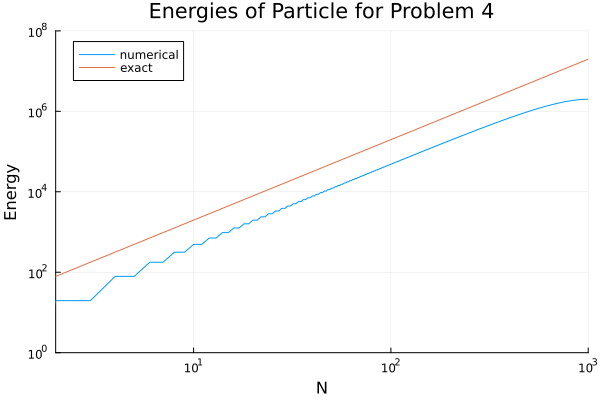

In [5]:
using Plots
theme(:default)
plot(energies1,label="numerical",xlabel="N", ylabel="Energy", title="Energy vs N", legend=:topleft,yscale=:log10,xscale=:log10,xlims=(2,1000),ylims=(1,10^8))
plot!(exact_energies1,label="exact",title="Energies of Particle for Problem 4",)
